In [ ]:
"""
  I used an API to get the prayer times
  API link https://aladhan.com/prayer-times-api#GetCalendar

"""

'\n  I used an API to get the prayer times\n  API : GET /v2/times/dates.json\n  API link https://prayertimes.date/api/docs/dates\n\n'

# Data Preparation and Preprocessing

In [1]:
import requests
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [98]:
%%time
from tqdm import tqdm
responds = []
for j in tqdm(range(2021,2024)):
  for i in range(1,13):
    respond = requests.get("https://api.aladhan.com/v1/calendarByCity/"+str(j)+"/"+str(i)+"?city=Cairo&country=Egypt&method=5") #by city ad country
    respond = respond.json()
    responds.append(respond)

100%|██████████| 3/3 [00:06<00:00,  2.14s/it]

CPU times: user 680 ms, sys: 29.8 ms, total: 710 ms
Wall time: 6.42 s


In [99]:
print(responds[0])

{'code': 200, 'status': 'OK', 'data': [{'timings': {'Fajr': '05:18 (EET)', 'Sunrise': '06:51 (EET)', 'Dhuhr': '11:58 (EET)', 'Asr': '14:48 (EET)', 'Sunset': '17:06 (EET)', 'Maghrib': '17:06 (EET)', 'Isha': '18:29 (EET)', 'Imsak': '05:08 (EET)', 'Midnight': '23:58 (EET)', 'Firstthird': '21:41 (EET)', 'Lastthird': '02:16 (EET)'}, 'date': {'readable': '01 Jan 2021', 'timestamp': '1609484461', 'gregorian': {'date': '01-01-2021', 'format': 'DD-MM-YYYY', 'day': '01', 'weekday': {'en': 'Friday'}, 'month': {'number': 1, 'en': 'January'}, 'year': '2021', 'designation': {'abbreviated': 'AD', 'expanded': 'Anno Domini'}}, 'hijri': {'date': '17-05-1442', 'format': 'DD-MM-YYYY', 'day': '17', 'weekday': {'en': "Al Juma'a", 'ar': 'الجمعة'}, 'month': {'number': 5, 'en': 'Jumādá al-ūlá', 'ar': 'جُمادى الأولى'}, 'year': '1442', 'designation': {'abbreviated': 'AH', 'expanded': 'Anno Hegirae'}, 'holidays': []}}, 'meta': {'latitude': 30.079694, 'longitude': 31.323437, 'timezone': 'Africa/Cairo', 'method': {

In [100]:
test = []
dates = []
for j in responds:
  for i in j['data']:
    test.append(i['timings'])
    dates.append(i['date']['gregorian']['date'])
data = pd.DataFrame(test)
data.insert(0,'Date',dates)
data.head(10)


,Date,Fajr,Sunrise,Dhuhr,Asr,Sunset,Maghrib,Isha,Imsak,Midnight,Firstthird,Lastthird
0,01-01-2021,05:18 (EET),06:51 (EET),11:58 (EET),14:48 (EET),17:06 (EET),17:06 (EET),18:29 (EET),05:08 (EET),23:58 (EET),21:41 (EET),02:16 (EET)
1,02-01-2021,05:19 (EET),06:51 (EET),11:59 (EET),14:48 (EET),17:07 (EET),17:07 (EET),18:30 (EET),05:09 (EET),23:59 (EET),21:41 (EET),02:16 (EET)
2,03-01-2021,05:19 (EET),06:51 (EET),11:59 (EET),14:49 (EET),17:07 (EET),17:07 (EET),18:30 (EET),05:09 (EET),23:59 (EET),21:42 (EET),02:17 (EET)
3,04-01-2021,05:19 (EET),06:51 (EET),12:00 (EET),14:50 (EET),17:08 (EET),17:08 (EET),18:31 (EET),05:09 (EET),00:00 (EET),21:43 (EET),02:17 (EET)
4,05-01-2021,05:19 (EET),06:52 (EET),12:00 (EET),14:50 (EET),17:09 (EET),17:09 (EET),18:32 (EET),05:09 (EET),00:00 (EET),21:43 (EET),02:17 (EET)
5,06-01-2021,05:20 (EET),06:52 (EET),12:01 (EET),14:51 (EET),17:10 (EET),17:10 (EET),18:32 (EET),05:10 (EET),00:01 (EET),21:44 (EET),02:18 (EET)
6,07-01-2021,05:20 (EET),06:52 (EET),12:01 (EET),14:52 (EET),17:11 (EET),17:11 (EET),18:33 (EET),05:10 (EET),00:01 (EET),21:44 (EET),02:18 (EET)
7,08-01-2021,05:20 (EET),06:52 (EET),12:01 (EET),14:52 (EET),17:11 (EET),17:11 (EET),18:34 (EET),05:10 (EET),00:02 (EET),21:45 (EET),02:18 (EET)
8,09-01-2021,05:20 (EET),06:52 (EET),12:02 (EET),14:53 (EET),17:12 (EET),17:12 (EET),18:34 (EET),05:10 (EET),00:02 (EET),21:45 (EET),02:19 (EET)
9,10-01-2021,05:20 (EET),06:52 (EET),12:02 (EET),14:54 (EET),17:13 (EET),17:13 (EET),18:35 (EET),05:10 (EET),00:02 (EET),21:46 (EET),02:19 (EET)


In [101]:
data = data.applymap(lambda x: str(x).replace('(EET)', '').strip())
data = data.applymap(lambda x: str(x).replace('(EEST)', '').strip())
data.head(10)

,Date,Fajr,Sunrise,Dhuhr,Asr,Sunset,Maghrib,Isha,Imsak,Midnight,Firstthird,Lastthird
0,01-01-2021,05:18,06:51,11:58,14:48,17:06,17:06,18:29,05:08,23:58,21:41,02:16
1,02-01-2021,05:19,06:51,11:59,14:48,17:07,17:07,18:30,05:09,23:59,21:41,02:16
2,03-01-2021,05:19,06:51,11:59,14:49,17:07,17:07,18:30,05:09,23:59,21:42,02:17
3,04-01-2021,05:19,06:51,12:00,14:50,17:08,17:08,18:31,05:09,00:00,21:43,02:17
4,05-01-2021,05:19,06:52,12:00,14:50,17:09,17:09,18:32,05:09,00:00,21:43,02:17
5,06-01-2021,05:20,06:52,12:01,14:51,17:10,17:10,18:32,05:10,00:01,21:44,02:18
6,07-01-2021,05:20,06:52,12:01,14:52,17:11,17:11,18:33,05:10,00:01,21:44,02:18
7,08-01-2021,05:20,06:52,12:01,14:52,17:11,17:11,18:34,05:10,00:02,21:45,02:18
8,09-01-2021,05:20,06:52,12:02,14:53,17:12,17:12,18:34,05:10,00:02,21:45,02:19
9,10-01-2021,05:20,06:52,12:02,14:54,17:13,17:13,18:35,05:10,00:02,21:46,02:19


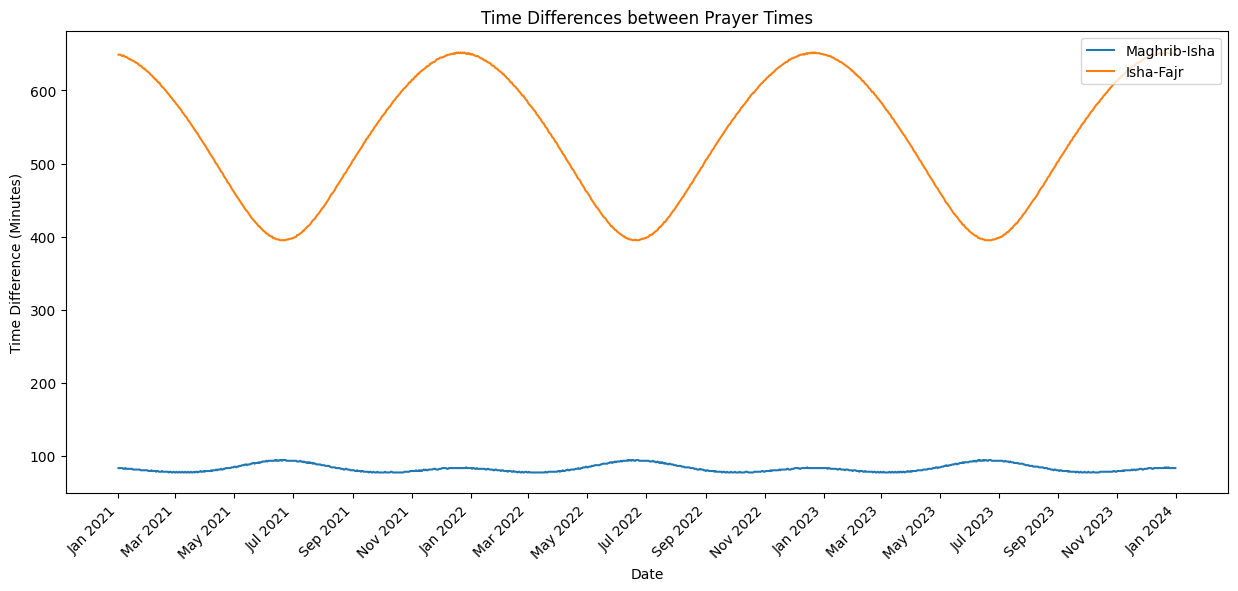

In [105]:
from copy import deepcopy
import matplotlib.dates as mdates
df = deepcopy(data)


df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Calculate the time differences
df['Maghrib_Isha'] = abs(pd.to_datetime(df['Isha']) - pd.to_datetime(df['Maghrib'])).dt.total_seconds() / (60)
df['Isha_Fajr'] = (24*60) - abs(pd.to_datetime(df['Fajr']) - pd.to_datetime(df['Isha'])).dt.total_seconds() / (60)


fig, ax = plt.subplots()
#ax.plot(df['Date'], df['Fajr_Dhuhr'], label='Fajr-Dhuhr')
ax.plot(df['Date'], df['Maghrib_Isha'], label='Maghrib-Isha')
ax.plot(df['Date'], df['Isha_Fajr'], label='Isha-Fajr')

# Set the tick format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Only show ticks for every other month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format the tick labels to show month and year

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add legend and labels
ax.legend(loc = 'upper right')
ax.set_xlabel('Date')
ax.set_ylabel('Time Difference (Minutes)')
ax.set_title('Time Differences between Prayer Times')
fig.set_size_inches(15, 6)

# Display the plot
plt.show()


In [106]:
import plotly.graph_objs as go
from copy import deepcopy
import pandas as pd



fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['Maghrib_Isha'], name='Maghrib-Isha'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Isha_Fajr'], name = 'Isha-Fajr'))
# Set the X-axis formatter
fig.update_layout(xaxis=dict(tickformat='%d-%b'))

# Show only some days on the X-axis
fig.update_xaxes(
    dtick="M5",
    tickformat="%d-%b",
    tickangle=-45
)

# Add legend and labels
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    xaxis_title="Date",
    yaxis_title="Time Difference (Minutes)",
    title="Time Differences between Prayer Times"
)

# Show the plot
fig.show()


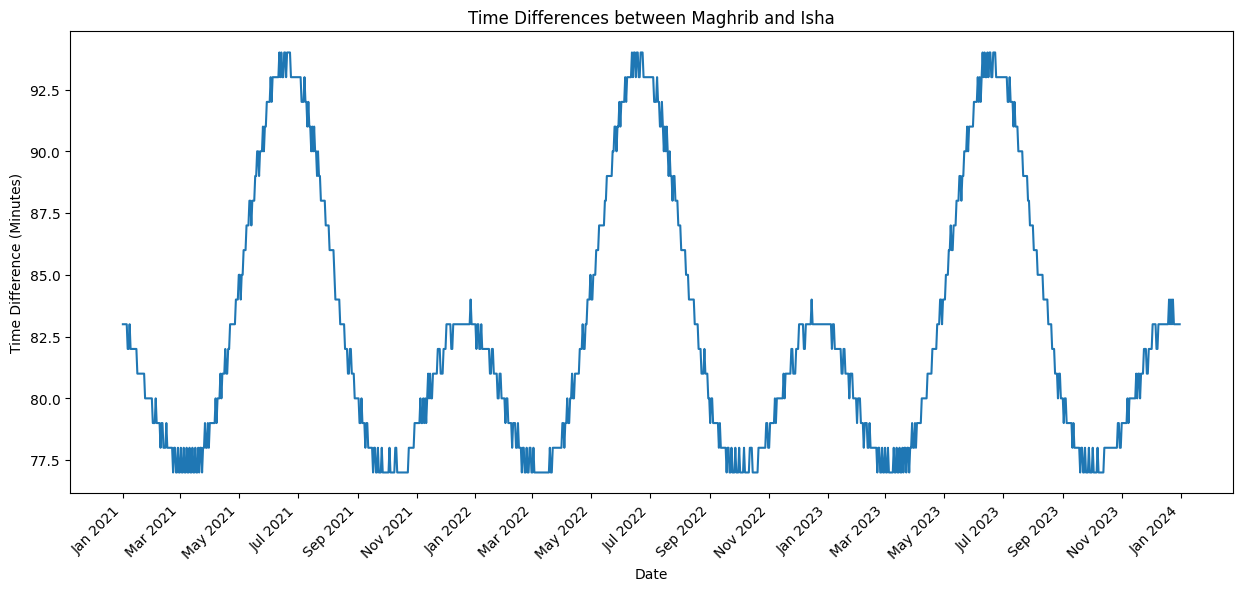

In [111]:
from copy import deepcopy
import matplotlib.dates as mdates

fig, ax = plt.subplots()
#ax.plot(df['Date'], df['Fajr_Dhuhr'], label='Fajr-Dhuhr')
ax.plot(df['Date'], df['Maghrib_Isha'], label='Maghrib-Isha')


# Set the tick format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Only show ticks for every other month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format the tick labels to show month and year

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add legend and labels
ax.set_xlabel('Date')
ax.set_ylabel('Time Difference (Minutes)')
ax.set_title('Time Differences between Maghrib and Isha')
fig.set_size_inches(15, 6)

# Display the plot
plt.show()


In [112]:
import plotly.graph_objs as go
from copy import deepcopy
import pandas as pd



fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['Maghrib_Isha'], name='Maghrib-Isha'))
# Set the X-axis formatter
fig.update_layout(xaxis=dict(tickformat='%d-%b'))

# Show only some days on the X-axis
fig.update_xaxes(
    dtick="M5",
    tickformat="%d-%b",
    tickangle=-45
)

# Add legend and labels
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    xaxis_title="Date",
    yaxis_title="Time Difference (Minutes)",
    title='Time Differences between Maghrib and Isha'
)

# Show the plot
fig.show()


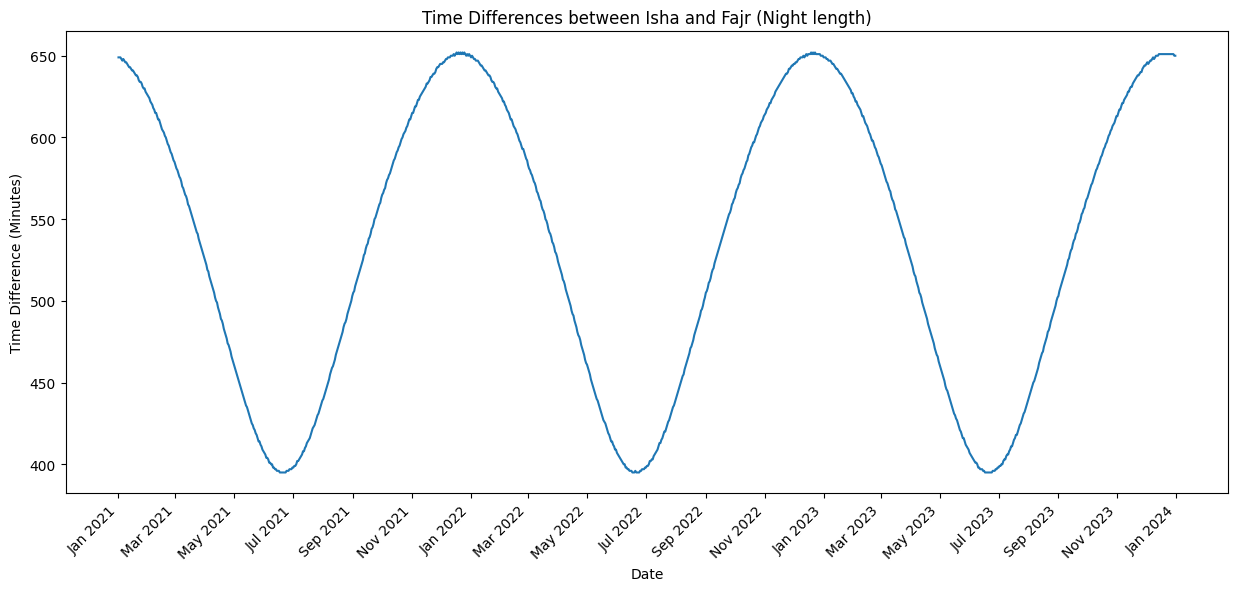

In [113]:
from copy import deepcopy
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Isha_Fajr'], label='Isha-Fajr')


# Set the tick format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Only show ticks for every other month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format the tick labels to show month and year

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add legend and labels
ax.set_xlabel('Date')
ax.set_ylabel('Time Difference (Minutes)')
ax.set_title('Time Differences between Isha and Fajr (Night length)')
fig.set_size_inches(15, 6)

# Display the plot
plt.show()


In [114]:
import plotly.graph_objs as go
from copy import deepcopy
import pandas as pd



fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['Isha_Fajr'], name = 'Isha-Fajr'))
# Set the X-axis formatter
fig.update_layout(xaxis=dict(tickformat='%d-%b'))

# Show only some days on the X-axis
fig.update_xaxes(
    dtick="M5",
    tickformat="%d-%b",
    tickangle=-45
)

# Add legend and labels
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    xaxis_title="Date",
    yaxis_title="Time Difference (Minutes)",
    title='Time Differences between Isha and Fajr (Night length)'
)

# Show the plot
fig.show()


In [116]:
import plotly.graph_objs as go
from copy import deepcopy
import pandas as pd


df['Fajr_Isha'] = abs(pd.to_datetime(df['Isha']) - pd.to_datetime(df['Fajr'])).dt.total_seconds() / (60)


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['Fajr_Isha'], name = 'Fajr-Isha'))
# Set the X-axis formatter
fig.update_layout(xaxis=dict(tickformat='%d-%b'))

# Show only some days on the X-axis
fig.update_xaxes(
    dtick="M5",
    tickformat="%d-%b",
    tickangle=-45
)

# Add legend and labels
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    xaxis_title="Date",
    yaxis_title="Time Difference (Minutes)",
    title='Time Differences between Fajr and Isha (Day length)'
)

# Show the plot
fig.show()


In [ ]:
# Plot the change in all prayers times
# Use the first day as the initial values and then minus the current value with the initial value and see how the prayers times change
# Hint: Use the first row as a dict and use this dict to calc the difference for each next row for the all prayers 
# plot this change for all the prayars on top of each other to see the correlation between the change of all prayers times